In [2]:
# Import libraries
%matplotlib inline
from IPython.display import Image 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from sqlite3 import Error
import warnings
warnings.filterwarnings('ignore')
plt.style.available[::]
sns.set_style("darkgrid")

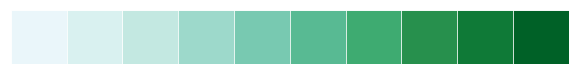

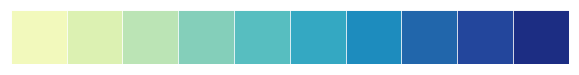

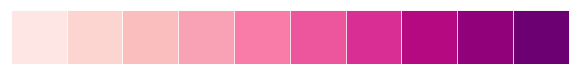

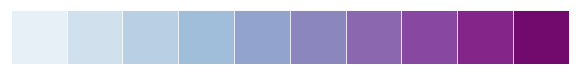

In [21]:
# Create color palettes for seaborn
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
RdPu = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']
sns.palplot(sns.color_palette("RdPu", 10))
BuPu = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
sns.palplot(sns.color_palette("BuPu", 10))

# Create DataFrame, clean data and discretize target variable

In [3]:
# Import csv file with song data
data = '/Users/florencialeoni/code/omg_i_love_that_song/data/spotify_genres_popularity.csv'

In [4]:
# Create DataFrame
spotify_df = pd.DataFrame.from_csv(data)

In [5]:
# Check data types
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266371 entries, 0 to 266382
Data columns (total 21 columns):
playlist_id         266371 non-null object
playlist_name       266371 non-null object
track_uri           266371 non-null object
track_name          266371 non-null object
artist_name         266371 non-null object
album_name          266371 non-null object
duration_ms         266371 non-null float64
key                 266371 non-null float64
mode                266371 non-null float64
time_signature      266371 non-null float64
acousticness        266371 non-null float64
danceability        266371 non-null float64
energy              266371 non-null float64
instrumentalness    266371 non-null float64
liveness            266371 non-null float64
loudness            266371 non-null float64
speechiness         266371 non-null float64
valence             266371 non-null float64
tempo               266371 non-null float64
release_date        266371 non-null object
popularity      

In [8]:
# Check data
spotify_df.head(50)

,playlist_id,playlist_name,track_uri,track_name,artist_name,album_name,duration_ms,key,mode,time_signature,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date,popularity
0,../data/spotify1.json-1,Throwbacks,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,226864.0,4.0,0.0,4.0,...,0.904,0.813,0.006970,0.0471,-7.105,0.1210,0.810,125.461,2005-07-04,65.0
1,../data/spotify1.json-1,Throwbacks,6I9VzXrHxO9rA9A5euc8Ak,Toxic,Britney Spears,In The Zone,198800.0,5.0,0.0,4.0,...,0.774,0.838,0.025000,0.2420,-3.914,0.1140,0.924,143.040,2003-11-13,78.0
2,../data/spotify1.json-1,Throwbacks,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),235933.0,2.0,0.0,4.0,...,0.664,0.758,0.000000,0.0598,-6.583,0.2100,0.701,99.259,2003,58.0
3,../data/spotify1.json-1,Throwbacks,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,Justin Timberlake,Justified,267267.0,4.0,0.0,4.0,...,0.891,0.714,0.000234,0.0521,-6.055,0.1400,0.818,100.972,2002-11-04,72.0
4,../data/spotify1.json-1,Throwbacks,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,Shaggy,Hot Shot,227600.0,0.0,1.0,4.0,...,0.853,0.606,0.000000,0.3130,-4.596,0.0713,0.654,94.759,2000,17.0
5,../data/spotify1.json-1,Throwbacks,0XUfyU2QviPAs6bxSpXYG4,Yeah!,Usher,Confessions,250373.0,2.0,1.0,4.0,...,0.881,0.788,0.000000,0.0377,-4.669,0.1680,0.592,104.997,2004-03-08,3.0
6,../data/spotify1.json-1,Throwbacks,68vgtRHr7iZHpzGpon6Jlo,My Boo,Usher,Confessions,223440.0,5.0,1.0,4.0,...,0.662,0.507,0.000000,0.0465,-8.238,0.1180,0.676,86.412,2004-03-23,76.0
7,../data/spotify1.json-1,Throwbacks,3BxWKCI06eQ5Od8TY2JBeA,Buttons,The Pussycat Dolls,PCD,225560.0,2.0,1.0,4.0,...,0.544,0.823,0.000000,0.2680,-4.318,0.3200,0.434,210.750,2005-01-01,63.0
8,../data/spotify1.json-1,Throwbacks,7H6ev70Weq6DdpZyyTmUXk,Say My Name,Destiny's Child,The Writing's On The Wall,271333.0,5.0,0.0,4.0,...,0.713,0.678,0.000000,0.1490,-3.525,0.1020,0.734,138.009,1999-07-27,77.0
9,../data/spotify1.json-1,Throwbacks,2PpruBYCo4H7WOBJ7Q2EwM,Hey Ya! - Radio Mix / Club Mix,OutKast,Speakerboxxx/The Love Below,235213.0,4.0,0.0,4.0,...,0.728,0.974,0.000532,0.1750,-2.261,0.0665,0.965,79.526,2003,77.0


In [10]:
# Drop track_uri column from dataframe
spotify_df.drop(["track_uri"], axis = 1, inplace = True)

In [12]:
# Lambda function to strip and split release date string values
f = lambda x: str(x).split("-")[0].strip()

In [13]:
# Apply Lambda function to release date column, in order to keep only the year of release
spotify_df["release_date"] = spotify_df["release_date"].map(f)

In [14]:
# Sanity check
spotify_df.head(100)

,playlist_id,playlist_name,track_name,artist_name,album_name,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date,popularity
0,../data/spotify1.json-1,Throwbacks,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,226864.0,4.0,0.0,4.0,0.031100,0.904,0.813,0.006970,0.0471,-7.105,0.1210,0.810,125.461,2005,65.0
1,../data/spotify1.json-1,Throwbacks,Toxic,Britney Spears,In The Zone,198800.0,5.0,0.0,4.0,0.024900,0.774,0.838,0.025000,0.2420,-3.914,0.1140,0.924,143.040,2003,78.0
2,../data/spotify1.json-1,Throwbacks,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),235933.0,2.0,0.0,4.0,0.002380,0.664,0.758,0.000000,0.0598,-6.583,0.2100,0.701,99.259,2003,58.0
3,../data/spotify1.json-1,Throwbacks,Rock Your Body,Justin Timberlake,Justified,267267.0,4.0,0.0,4.0,0.202000,0.891,0.714,0.000234,0.0521,-6.055,0.1400,0.818,100.972,2002,72.0
4,../data/spotify1.json-1,Throwbacks,It Wasn't Me,Shaggy,Hot Shot,227600.0,0.0,1.0,4.0,0.056100,0.853,0.606,0.000000,0.3130,-4.596,0.0713,0.654,94.759,2000,17.0
5,../data/spotify1.json-1,Throwbacks,Yeah!,Usher,Confessions,250373.0,2.0,1.0,4.0,0.021200,0.881,0.788,0.000000,0.0377,-4.669,0.1680,0.592,104.997,2004,3.0
6,../data/spotify1.json-1,Throwbacks,My Boo,Usher,Confessions,223440.0,5.0,1.0,4.0,0.257000,0.662,0.507,0.000000,0.0465,-8.238,0.1180,0.676,86.412,2004,76.0
7,../data/spotify1.json-1,Throwbacks,Buttons,The Pussycat Dolls,PCD,225560.0,2.0,1.0,4.0,0.158000,0.544,0.823,0.000000,0.2680,-4.318,0.3200,0.434,210.750,2005,63.0
8,../data/spotify1.json-1,Throwbacks,Say My Name,Destiny's Child,The Writing's On The Wall,271333.0,5.0,0.0,4.0,0.273000,0.713,0.678,0.000000,0.1490,-3.525,0.1020,0.734,138.009,1999,77.0
9,../data/spotify1.json-1,Throwbacks,Hey Ya! - Radio Mix / Club Mix,OutKast,Speakerboxxx/The Love Below,235213.0,4.0,0.0,4.0,0.103000,0.728,0.974,0.000532,0.1750,-2.261,0.0665,0.965,79.526,2003,77.0


In [15]:
# Lambda function to strip and split release date string values to int
g = lambda x: int(x)
# Apply Lambda function to release date column
spotify_df["release_date"] = spotify_df["release_date"].map(g)

In [16]:
# Check data types
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266371 entries, 0 to 266382
Data columns (total 20 columns):
playlist_id         266371 non-null object
playlist_name       266371 non-null object
track_name          266371 non-null object
artist_name         266371 non-null object
album_name          266371 non-null object
duration_ms         266371 non-null float64
key                 266371 non-null float64
mode                266371 non-null float64
time_signature      266371 non-null float64
acousticness        266371 non-null float64
danceability        266371 non-null float64
energy              266371 non-null float64
instrumentalness    266371 non-null float64
liveness            266371 non-null float64
loudness            266371 non-null float64
speechiness         266371 non-null float64
valence             266371 non-null float64
tempo               266371 non-null float64
release_date        266371 non-null int64
popularity          266371 non-null float64
dtypes: float64(

In [19]:
# Use pd.cut to segment danceability values into bins (discretizing a continuous variable)
pd.cut(spotify_df["danceability"], bins = 10, labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
       right = True, include_lowest = True).head()


0    1.0
1    0.8
2    0.7
3    0.9
4    0.9
Name: danceability, dtype: category
Categories (10, float64): [0.1 < 0.2 < 0.3 < 0.4 ... 0.7 < 0.8 < 0.9 < 1.0]

In [20]:
# Assign binning to dancebility columns
spotify_df["danceability"] = pd.cut(spotify_df["danceability"], bins = 10, labels = 
                                    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                                    right = True, include_lowest = True)
spotify_df.head()

,playlist_id,playlist_name,track_name,artist_name,album_name,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date,popularity
0,../data/spotify1.json-1,Throwbacks,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,226864.0,4.0,0.0,4.0,0.03110,1.0,0.813,0.006970,0.0471,-7.105,0.1210,0.810,125.461,2005,65.0
1,../data/spotify1.json-1,Throwbacks,Toxic,Britney Spears,In The Zone,198800.0,5.0,0.0,4.0,0.02490,0.8,0.838,0.025000,0.2420,-3.914,0.1140,0.924,143.040,2003,78.0
2,../data/spotify1.json-1,Throwbacks,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),235933.0,2.0,0.0,4.0,0.00238,0.7,0.758,0.000000,0.0598,-6.583,0.2100,0.701,99.259,2003,58.0
3,../data/spotify1.json-1,Throwbacks,Rock Your Body,Justin Timberlake,Justified,267267.0,4.0,0.0,4.0,0.20200,0.9,0.714,0.000234,0.0521,-6.055,0.1400,0.818,100.972,2002,72.0
4,../data/spotify1.json-1,Throwbacks,It Wasn't Me,Shaggy,Hot Shot,227600.0,0.0,1.0,4.0,0.05610,0.9,0.606,0.000000,0.3130,-4.596,0.0713,0.654,94.759,2000,17.0
